---

# 2.3 Newton's method and variants
---

Let 

$$f \in C^2[a,b].$$ 

That is, $f$ is a **twice-continuously differentiable** function over $[a,b]$, which means that the **first** and **second** derivatives of $f$ **exist** and are **continuous** on the open interval $(a,b)$. **Newton's method** is defined as:

$$ x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}, \quad k = 0, 1, 2, \ldots.$$

This is the fixed point iteration using the function $g(x) = x - f(x)\big/f'(x)$.

We have already seen above that this iteration can converge very fast. This is why Newton's method is one of the most popular methods for root finding.

## Formulating Newton's method

Suppose that $f(x^*) = 0$ and that we are at the iterate $x_k$. By the Taylor Series Theorem, we have

$$
f(x^*) = f(x_k) + f'(x_k)(x^* - x_k) + \frac{f''(\xi)}{2}(x^* - x_k)^2,
$$

for some point $\xi$ between $x^*$ and $x_k$. If $x_k$ is already fairly close to $x^*$, then $(x^* - x_k)^2$ will be very small, so we have

$$0 \approx f(x_k) + f'(x_k)(x^* - x_k).$$

Solving for $x^*$, we obtain

$$x^* \approx x_k - \frac{f(x_k)}{f'(x_k)}.$$

Therefore, it makes sense to define our next iterate $x_{k+1}$ using this approximation.

## Another formulation

Another way to obtain Newton's method is as follows. Consider the **first-order (linear) approximation** of $f$ around the point $x_k$:

$$f(x) \approx f(x_k) + f'(x_k)(x - x_k), \quad \text{for all $x \approx x_k$}.$$

Suppose that $x_k$ is close to $x^*$, and that $f(x^*) = 0$. Then

$$f(x^*) \approx f(x_k) + f'(x_k)(x^* - x_k),$$

which implies that

$$x^* \approx x_k - \frac{f(x_k)}{f'(x_k)}.$$

Therefore, our next iterate should be 

$$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}.$$

---

## An implementation of Newton's Method: `plotnewton`

In [1]:
using PyPlot
using Printf

function plotnewton(f, fp, x0, a, b; tol=1e-6, maxiter=10)
    
    xspan = range(a, stop=b, length=1000)
    plot(xspan, f.(xspan), "b")
    hlines(0, a, b)
    xlim(a, b)
    
    k = 0
    x = x0
    fx = f(x)
    xold, xnew = x, Inf
    @printf "%4s %22s %22s\n" "k" "x" "f(x)"
    while abs(xnew - xold) > tol*(1 + abs(xold)) && k < maxiter
        k += 1
        xnew = x - fx/fp(x)
        
        # Plotting stuff
        vlines(x, 0, fx, linestyles=":")
        plot([xnew, x], [0, fx], "r")
        plot(x, fx, "bo")
        
        xold = x
        x = xnew
        fx = f(x)
        @printf "%4d %22.15e %22.15e\n" k x fx
    end
    
    return x
    
end

plotnewton (generic function with 1 method)

---

## Example

Let's see how Newton's method works on $f(x) = \sin(x)$.

   k                      x                   f(x)
   1 -1.633123935319537e+16 -6.575902390313486e-01
   2 -1.633123935319537e+16 -6.575902390313486e-01

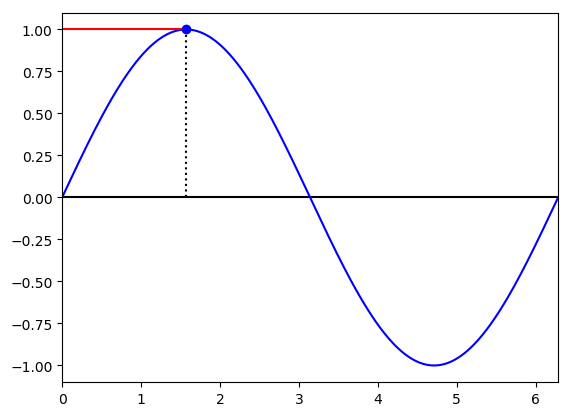


abs(x - pi) = 1.6331239353195372e16


In [2]:
x = plotnewton(sin, cos, pi/2, 0, 2π)
@show abs(x - pi);

---

## Example

Let's use the above code to plot Newton's method using 

$$f(x) = 2\cosh(x/4) - x,$$

which has two roots,

$$x_1^* \approx 2.3575510538774020 \qquad \text{and} \qquad x_2^* \approx 8.5071995707130270.$$

Which root do you converge to starting at $x_0 = 2, 4, 8, 10$?

In [3]:
xbad = 4asinh(2.)

5.774541900715241

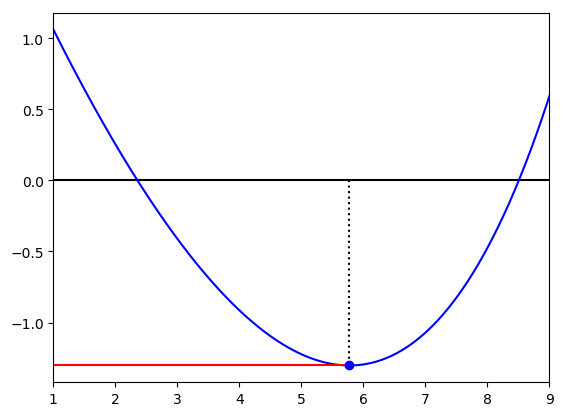

   k                      x                   f(x)
   1 -1.173102986362034e+16                    Inf
   2                    NaN                    NaN


NaN

In [4]:
x = plotnewton(
    x -> 2cosh(x/4) - x,  # f(x)
    x -> .5sinh(x/4) - 1, # f'(x)
    xbad, 1, 9)

---

## Example (The Babylonian method for computing $\sqrt{a}$)

Let $f(x) = x^2 - a$. Newton's method gives us the iteration:

$$ x_{k+1} = x_k - \frac{x_k^2 - a}{2x_k} = \frac{1}{2}\left(x_k + \frac{a}{x_k}\right).$$

This is known as the [Babylonian method](http://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Babylonian_method) for computing square roots. This method only requires addition and division, and converges rapidly.

In [5]:
# Let's do this using BigFloat

setprecision(256)
a = big"10."
x = a
@printf "%4s %10s\n" "k" "|xk - √a|"
for k = 1:8
    x = (x + a/x)/2
    @printf "%4d %10.1e\n" k abs(x - sqrt(a))
end

   k  |xk - √a|
   1    2.3e+00
   2    5.0e-01
   3    3.4e-02
   4    1.8e-04
   5    5.0e-09
   6    4.0e-18
   7    2.5e-36
   8    9.8e-73


   k                      x                   f(x)


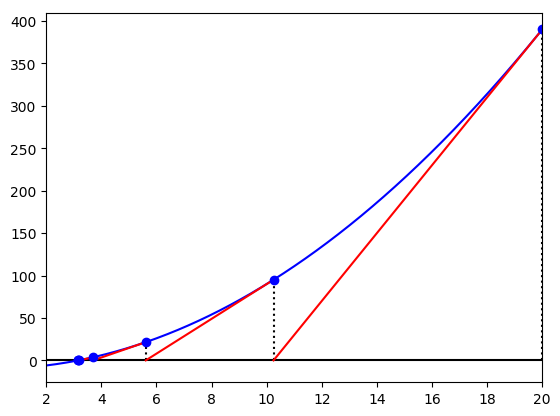

   1  1.025000000000000e+01  9.506250000000000e+01
   2  5.612804878048781e+00  2.150357859904819e+01
   3  3.697222645433951e+00  3.669455289909621e+00
   4  3.200977809537825e+00  2.462589371535735e-01
   5  3.162511604551991e+00  1.479648926011379e-03
   6  3.162277668821308e+00  5.472592690125566e-08
   7  3.162277660168380e+00  1.776356839400250e-15
abs(r - sqrt(10)) = 0.0


In [6]:
r = plotnewton(x -> x^2-10, x -> 2x, 20, 2, 20)
@show abs(r - sqrt(10));

---

## Speed of Convergence

If $x_k \to x^*$, we can measure the speed of the convergence as follows.

- **Linear convergence** means there is a constant $0 < \rho < 1$ such that

  $$\left|x_{k+1}-x^*\right| \leq \rho \left|x_k - x^*\right|, \quad \text{for all $k$ sufficiently large};$$
  
  that is,
  
  $$ \lim_{k \to \infty} \frac{\left|x_{k+1}-x^*\right|}{\left|x_k - x^*\right|} = \rho < 1.$$
  

- **Superlinear convergence** means there is a sequence $\rho_k \to 0$ such that

  $$\left|x_{k+1}-x^*\right| \leq \rho_k \left|x_k - x^*\right|, \quad \text{for all $k$ sufficiently large};$$

  that is,
  
  $$ \lim_{k \to \infty} \frac{\left|x_{k+1}-x^*\right|}{\left|x_k - x^*\right|} = 0.$$
  

- **Quadratic convergence** means there is a constant $M$ such that

  $$\left|x_{k+1}-x^*\right| \leq M \left|x_k - x^*\right|^2, \quad \text{for all $k$ sufficiently large};$$
  
  that is,
  
  $$ \lim_{k \to \infty} \frac{\left|x_{k+1}-x^*\right|}{\left|x_k - x^*\right|^2} = M < \infty.$$


Note that **quadratic convergence** is an example of **superlinear convergence** with $\rho_k = M \left|x_k - x^*\right|$.

---

> ## Theorem (Quadratic convergence of Newton's Method):
Let $f \in C^2[a,b]$. If $f$ has a root $x^* \in (a,b)$ such that $f'(x^*) \neq 0$, then there is a $\delta > 0$ such that Newton's method **converges quadratically** to $x^*$ from any $x_0 \in [x^*-\delta, x^*+\delta]$.

## Proof:

Since:

- $f \in C^2[a,b]$ 
- $x^* \in (a,b)$
- $f'(x^*) \neq 0$

there are positive constants $\delta_1$, $\varepsilon$, and $M$ such that

- $\left|f'(x)\right| \geq \varepsilon$ 
- $\left|f''(x)\right| \leq M$

for all $x \in [x^*-\delta_1, x^*+\delta_1] \subset (a,b)$.

Suppose $x_k \in [x^*-\delta_1, x^*+\delta_1]$. Then, there is a $\xi_k$ between $x^*$ and $x_k$ such that

$$ f(x^*) = f(x_k) + f'(x_k) (x^* - x_k) + \frac{f''(\xi_k)}{2} (x^* - x_k)^2.$$

Using the fact that $f(x^*) = 0$ and $f'(x_k) \neq 0$, we can rearrange this equation to get

$$ -\frac{f(x_k)}{f'(x_k)} - x^* + x_k =  \frac{f''(\xi_k)}{2f'(x_k)} (x^* - x_k)^2.$$

Since $x_{k+1} = x_k - f(x_k)\big/f'(x_k)$, we have 

$$x^* - x_{k+1} = -\frac{f''(\xi_k)}{2f'(x_k)} (x^* - x_k)^2.$$

Thus,

$$\left|x^* - x_{k+1}\right| = \left|\frac{f''(\xi_k)}{2f'(x_k)}\right| \left|x^* - x_k\right|^2 \leq \frac{M}{2\varepsilon} \left|x^* - x_k\right|^2,$$

so if $x_k \to x^*$, then the **convergence will be quadratic**.

We just need to find $\delta > 0$ so that if $x_0 \in [x^* - \delta, x^* + \delta]$, then $x_k \to x^*$.

Let $\lambda \in (0, 1)$ and let

$$\delta = \min\left\{\frac{2\varepsilon\lambda}{M}, \delta_1\right\}.$$

Suppose that $x_k \in [x^* - \delta, x^* + \delta]$. Then

$$
\begin{split}
\left|x^* - x_{k+1}\right| 
&\leq \frac{M}{2\varepsilon} \left|x^* - x_k\right|^2 \\
&\leq \frac{M}{2\varepsilon} \delta \left|x^* - x_k\right| \\
&\leq \lambda \left|x^* - x_k\right| \\
&< \delta,
\end{split}
$$

so $x_{k+1} \in [x^* - \delta, x^* + \delta]$ as well. Thus, if $x_0 \in [x^* - \delta, x^* + \delta]$, we have $x_k \in [x^* - \delta, x^* + \delta]$ for $k = 0, 1, 2, \ldots$. 

Moreover,

$$\left|x^* - x_k\right| \leq \lambda \left|x^* - x_{k-1}\right| \leq \lambda^2 \left|x^* - x_{k-2}\right| \leq \cdots \leq \lambda^k \left|x^* - x_{0}\right|.$$

Since $\lambda \in (0,1)$, we have $\lambda^k \left|x^* - x_{0}\right| \to 0$ as $k \to \infty$. Thus, if $x_0 \in [x^* - \delta, x^* + \delta]$ then $x_k$ converges to $x^*$ quadratically. $\blacksquare$

---

## Pros and cons of Newton's method

Pros:

1. **Fast to converge:** Newton's method enjoys quadratic convergence near the root when $f'(x^*) \neq 0$.

2. **Generalizes to multiple variables:** Let $\mathbf{F} \colon \mathbb{R}^n \to \mathbb{R}^n$. Newton's method for solving 
   
   $$\mathbf{F}(\mathbf{x}) = \mathbf{0}$$ 
   
   (i.e., $n$ nonlinear equations with $n$ unknowns) is

   $$ \mathbf{x}_{k+1} = \mathbf{x}_k - \mathbf{J}(\mathbf{x}_k)^{-1} \mathbf{F}(\mathbf{x}_k),$$

   where $\mathbf{J}(\mathbf{x})$ is the $n \times n$ **Jacobian** of $\mathbf{F}$:
   
   $$
   \mathbf{J}(\mathbf{x}) = 
   \begin{bmatrix}
   \frac{\partial F_1}{\partial x_1}& \cdots &
   \frac{\partial F_1}{\partial x_n}\\
   \vdots & \ddots & \vdots \\
   \frac{\partial F_n}{\partial x_1}& \cdots &
   \frac{\partial F_n}{\partial x_n}\\
   \end{bmatrix}$$


Cons:

1. **Requires the derivative:** We must give Newton's method both the function $f$ and its derivative $f'$. This may not always be possible or easy.

2. **Need to start close to $x^*$:** Newton's method is a **local method**. When $x_0$ is far from $x^*$, Newton's method may not converge to $x^*$, or may require many iterations before quadratic convergence begins.


---

## Secant method

Sometimes it is not possible to evaluate the derivative $f'$:

- $f'$ is unknown or difficult to obtain
- evaluating $f'$ takes too much time

Instead, we can use the **secant approximation** of the derivative. When $x_k \approx x_{k-1}$, we have

$$ f'(x_k) \approx \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}}.$$

Plugging this approximation into the formula for Newton's method, we get:

$$x_{k+1} = x_k - \frac{f(x_k)(x_k - x_{k-1})}{f(x_k) - f(x_{k-1})}$$

The secant method is an example of a [quasi-Newton](http://en.wikipedia.org/wiki/Quasi-Newton_method) method since we are replacing $f'$ with an approximation of $f'$.

When $f'(x^*) \neq 0$, the secant method will converge **superlinearly**, so it may not be as fast as Newton's method.

---

## An implementation of the secant method: `plotsecant`

In [7]:
using PyPlot
using Printf

function plotsecant(f, x0, x1, a, b; tol=1e-6, maxiter=10, doplot=true)
    
    if doplot
        xspan = range(a, stop=b, length=1000)
        plot(xspan, f.(xspan), "b")
        hlines(0, a, b)
        xlim(a, b)
    end
    
    k = 0
    xprev = x0
    x = x1
    fxprev = f(xprev)
    fx = f(x)
    
    if doplot
        vlines(xprev, 0, fxprev, linestyles=":")
        plot(xprev, fxprev, "bo")
    end
    
    @printf "%4s %22s %22s\n" "k" "x" "f(x)"
    while abs(x - xprev) > tol*(1 + abs(x)) && k < maxiter
        k += 1
        xnew = x - fx*(x - xprev)/(fx - fxprev)
        
        # Plotting stuff
        if doplot
            vlines(x, 0, fx, linestyles=":")
            plot([xnew, xprev, x], [0, fxprev, fx], "r")
            plot(x, fx, "bo")
        end
        
        xprev = x
        x = xnew
        fxprev = f(xprev)
        fx = f(x)
        @printf "%4d %22.15e %22.15e\n" k x fx
    end
    
    return x
    
end

plotsecant (generic function with 1 method)

---

## Example

Let's see how the secant method works on $f(x) = \sin(x)$.

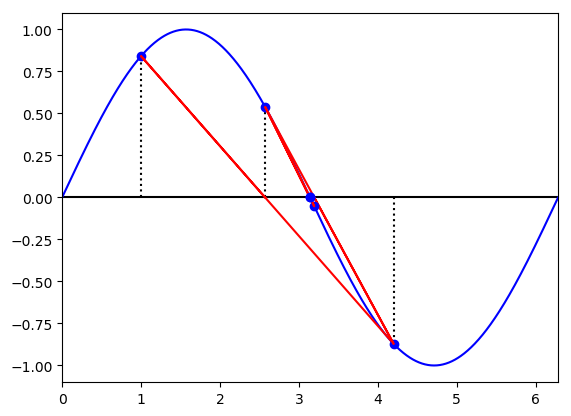

   k                      x                   f(x)
   1  2.571881876565218e+00  5.393885290622232e-01
   2  3.194284752967183e+00 -5.266771986775176e-02
   3  3.138917479336568e+00  2.675171062386798e-03
   4  3.141593829012750e+00 -1.175422957066463e-06
   5  3.141592653588392e+00  1.401223921756862e-12
abs(x - pi) = 1.4011014570769476e-12


In [8]:
x = plotsecant(sin, 1.0, 4.2, 0, 2π, maxiter=100)
@show abs(x - pi);

---

## Example

Recall the example of finding the value of $y_0$ such that the solution $y(t)$ of the ordinary differential equation 

$$
\frac{dy}{dt} = t - 5 + \frac{y^2}{100}
$$

with initial value $y(0) = y_0$ satisfies $y(10) = 20$.

In [9]:
using ODE

function foo(y0)
    tspan = range(0, stop=10, length=10)
    tout, yout = ode4((t, y) -> t - 5 + y^2/100, y0, tspan)
    return yout[end]
end

foo (generic function with 1 method)

In [10]:
foo(12.)

16.61733934545153

In [11]:
foo(13.)

20.298747830493898

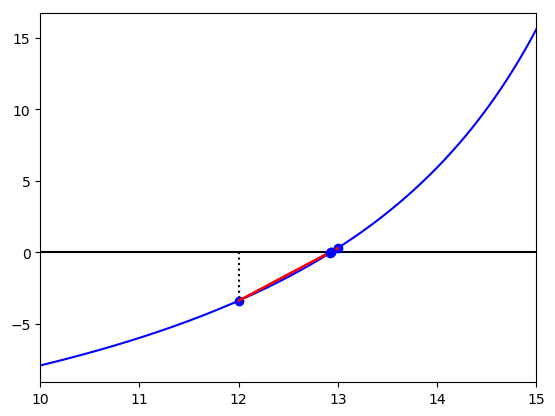

   k                      x                   f(x)
   1  1.291884958387321e+01 -5.636706066426811e-02
   2  1.293173051492578e+01 -7.922504884376735e-04
   3  1.293191413991497e+01  2.131010610639805e-06
   4  1.293191364732193e+01 -8.034461984607333e-11


12.931913647321926

In [12]:
x = plotsecant(y0 -> foo(y0) - 20, 12.0, 13.0, 10, 15)

---

## The case of a multiple root

When $f'(x^*) = 0$, we are no longer guaranteed to obtain superlinear convergence of the secant method, nor quadratic convergence of Newton's method. In this case, both methods will be merely **linearly convergent**.

Let's try these methods on the function

$$f(x) = x^2$$

for which $x^* = 0$ is a root of **multiplicity** 2.

   k                      x                   f(x)
   1  2.000000000000000e+00  4.000000000000000e+00
   2  1.000000000000000e+00  1.000000000000000e+00
   3  5.000000000000000e-01  2.500000000000000e-01
   4  2.500000000000000e-01  6.250000000000000e-02
   5  1.250000000000000e-01  1.562500000000000e-02
   6  6.250000000000000e-02  3.906250000000000e-03
   7  3.125000000000000e-02  9.765625000000000e-04
   8  1.562500000000000e-02  2.441406250000000e-04
   9  7.812500000000000e-03  6.103515625000000e-05
  10  3.906250000000000e-03  1.525878906250000e-05
  11  1.953125000000000e-03  3.814697265625000e-06
  12  9.765625000000000e-04  9.536743164062500e-07
  13  4.882812500000000e-04  2.384185791015625e-07
  14  2.441406250000000e-04  5.960464477539063e-08
  15  1.220703125000000e-04  1.490116119384766e-08
  16  6.103515625000000e-05  3.725290298461914e-09
  17  3.051757812500000e-0

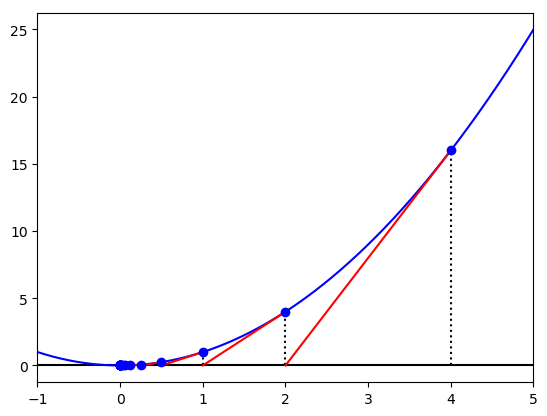

5  9.313225746154785e-10
  18  1.525878906250000e-05  2.328306436538696e-10
  19  7.629394531250000e-06  5.820766091346741e-11
  20  3.814697265625000e-06  1.455191522836685e-11
  21  1.907348632812500e-06  3.637978807091713e-12
  22  9.536743164062500e-07  9.094947017729282e-13


9.5367431640625e-7

In [18]:
x = plotnewton(x -> x^2, x -> 2x, 4.0, -1, 5, maxiter=100)

   k                      x                   f(x)
   1  1.714285714285714e+00  2.938775510204081e+00
   2  1.090909090909091e+00  1.190082644628099e+00
   3  6.666666666666667e-01  4.444444444444445e-01
   4  4.137931034482759e-01  1.712247324613555e-01
   5  2.553191489361702e-01  6.518786781349029e-02
   6  1.578947368421053e-01  2.493074792243767e-02
   7  9.756097560975610e-02  9.518143961927425e-03
   8  6.030150753768845e-02  3.636271811317896e-03
   9  3.726708074534162e-02  1.388835307279812e-03
  10  2.303262955854127e-02  5.305020243809890e-04
  11  1.423487544483986e-02  2.026316789301047e-04
  12  8.797653958944281e-03  7.739871518132797e-05
  13  5.437245129134572e-03  2.956363459429763e-05
  14  3.360403248389807e-03  1.129230999178877e-05
  15  2.076843198338525e-03  4.313277670484995e-06
  16  1.283559739009520e-03  1.647525603606187e-06
  17  7.932835327559992e-04  6.292987633418385e-07
  18  4.902761889197583e-04  2.403707414216826e-07
  19  3.030073479281873e-04  9.

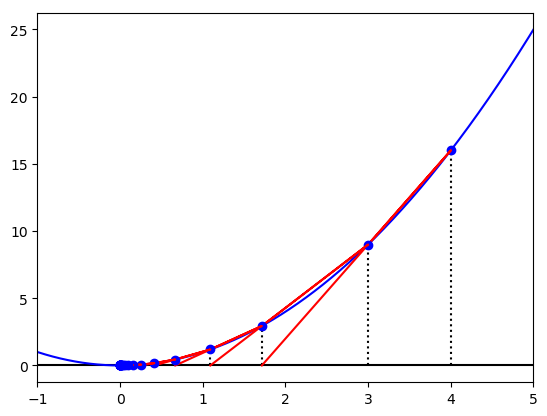

339540226430396e-08
  22  7.153033184113115e-05  5.116588373302341e-09
  23  4.420817630220711e-05  1.954362851967026e-09
  24  2.732215553592409e-05  7.465001831292274e-10
  25  1.688602076699121e-05  2.851376973432584e-10
  26  1.043613476876569e-05  1.089129089118402e-10
  27  6.449885998264982e-06  4.160102939061466e-11
  28  3.986248770491395e-06  1.589017926024416e-11
  29  2.463637227775785e-06  6.069508390082754e-12
  30  1.522611542715090e-06  2.318345910009228e-12


1.5226115427150904e-6

In [19]:
x = plotsecant(x -> x^2, 4.0, 3.0, -1, 5, maxiter=100)

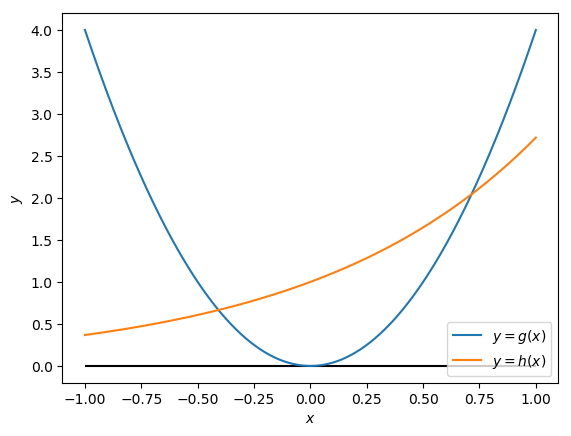

In [15]:
#Ex 1

f(x) = 4x^2 - exp(x)
g(x) = 4x^2
h(x) = exp(x)
a, b = -1, 1

using PyPlot
x = range(a, stop=b, length=1000)

#plot(x, f.(x), label=L"y = f(x)")
hlines(0, a, b)
plot(x, g.(x), label=L"y = g(x)")
plot(x, h.(x),  label=L"y = h(x)")
xlabel(L"x")
ylabel(L"y")
legend(loc="best");

In [17]:
#Ex 2
x = 3.143;
y = 31.43;
z = 314.3;
setprecision(4)
r1 = (x + y) + z
r2 = x + (y + z)
@printf "%4d %10.1e\n" r1 r2


 349    3.5e+02
